In [1]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
data = np.loadtxt("40.2_7_amplitude.txt")
f = data[:,0]
Vi = data[:,1]
Vo = data[:,2]
g = 20*np.log10(Vo/Vi)
frange = np.arange(1,1e6,10)

C:\Users\ruair\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


At f = 1/2πRC the amplitude of the transmitted signal is ~ 0.707 V
This corresponds to a gain of ~ -3.01 dB


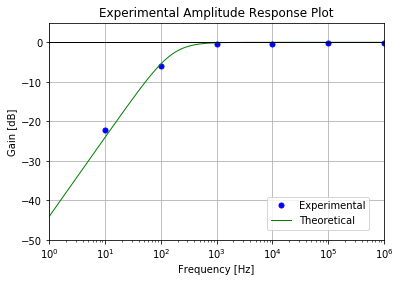

In [3]:
Vin = 1
R = 1e3
C = 1e-6
Vout = (Vin*R)/np.sqrt(R**2+(1/(f**2*C**2)))

def Vout(f):
    return (Vin*R)/np.sqrt(R**2+(1/((2*np.pi*f)**2*C**2)))

def gain(w,a,b,c):
    return 20*np.log10(Vout(w))

popt, pcov = curve_fit(gain,f,g)
best = gain(frange,popt[0],popt[1],popt[2])
plt.semilogx(f,g,'bo',markersize=5, label = "Experimental")
plt.semilogx(frange, best, 'g-',linewidth=1, label = "Theoretical")
plt.axhline(linewidth=1, color='k')
plt.axvline(linewidth=1, color='k')
plt.title('Experimental Amplitude Response Plot')
plt.ylabel('Gain [dB]')
plt.xlabel('Frequency [Hz]')
plt.legend(bbox_to_anchor=(0.65, 0.20), loc=2, borderaxespad=0.)
plt.axis([10**0,10**6,-50,5])
plt.grid(True)
plt.savefig('7_amplitude.png')

print('At f = 1/2πRC the amplitude of the transmitted signal is ~ {0:.3}'.format(Vout(1/(2*np.pi*R*C))),'V')
print('This corresponds to a gain of ~ {0:.3}'.format(gain(1/(2*np.pi*R*C),popt[0],popt[1],popt[2])),'dB')